# Classification with Decision Tree


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [6]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("*.csv"),
    description='Original file:',
    value = 'diabetes.csv',
    disabled=False,
)
display(files_dropdown)

fake_files_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/*.csv"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

Dropdown(description='Original file:', index=2, options=('creditcard.csv', 'data.csv', 'diabetes.csv'), value=…

Dropdown(description='Fake file:', options=('fake_data/diabetes_999.csv', 'fake_data/data_99.csv', 'fake_data/…

In [14]:
file_name=files_dropdown.value
if file_name == "data.csv":
    message = "Breast Cancer Wisconsin (Diagnostic) Data Set"
    class_name = "diagnosis"
    values_names = {0: "Benign", 1: "Malignant"}
elif file_name == "creditcard.csv":
    message = "Credit Card Fraud Detection"
    class_name = "Class"
    values_names = {0: "No Frauds", 1: "Frauds"}
elif file_name == "diabetes.csv":
    message="Pima Indians Diabetes Database"
    class_name = "Outcome"
    values_names = {0: "Normal", 1: "Diabets"}
else:
     exit()
    
    
data = pd.read_csv(file_name)
fake_data = pd.read_csv(fake_files_dropdown.value)


In [27]:
# Treatting the fake data
fake_data = fake_data.tail(5000)
fake_data.loc[fake_data.Outcome >= 0.5, 'Outcome'] = 1
fake_data.loc[fake_data.Outcome < 0.5, 'Outcome'] = 0

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
fake_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763000,6.98,96.93,9.94,-0.38,-2.34,28.06,1.28,32.57,0.0
763001,3.25,106.42,55.24,36.87,144.01,38.60,0.73,28.74,1.0
763002,8.71,156.42,100.98,0.23,-1.86,49.98,0.14,31.87,1.0
763003,3.52,95.41,61.64,20.97,105.53,28.76,0.31,25.07,1.0
763004,3.21,85.35,71.60,36.68,93.81,35.51,0.61,19.64,1.0


In [35]:
print("Original Data")
print("Outcome = 0: ", round(data["Outcome"].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data["Outcome"].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')

print("Fake Data")
print("Outcome = 0: ", round(fake_data["Outcome"].value_counts()[0]/len(fake_data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(fake_data["Outcome"].value_counts()[1]/len(fake_data) * 100,2), '%  of the dataset')

Original Data
Outcome = 0:  65.1 %  of the dataset
Outcome = 1:  34.9 %  of the dataset

Fake Data
Outcome = 0:  70.06 %  of the dataset
Outcome = 1:  29.94 %  of the dataset


In [40]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))

In [45]:
train = original_data_training_set
test = original_data_testing_set

In [68]:
trainX = train.iloc[:,:-1]
testX = test.iloc[:,:-1]
y_train = train["Outcome"]
y_test = test["Outcome"]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 3, min_samples_leaf = 100)
clf1 = clf1.fit(trainX,y_train)

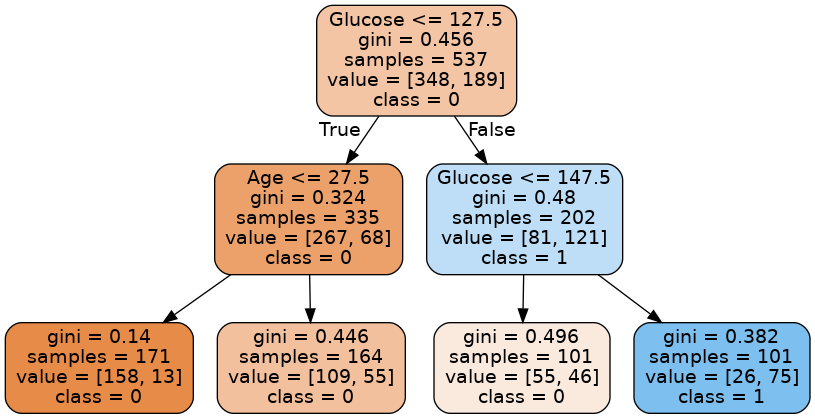

In [69]:
export_graphviz(clf1, out_file="tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())

In [70]:
pred = clf1.predict_proba(testX)
pred = np.argmax(pred, axis=1)

In [87]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.24347826086956523